In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
np.random.seed(1234)

# Predicting Fetal Health from Cardiotocography Data

### Introduction
#### What is CTG?

Cardiotocography (CTG) is a technique used during pregnancy to visually represent the fetal heart rate and uterine contractions. The main purpose of this kind of monitoring is to asses the fetal health in late pregnancy and during labour and to allow detection of fetal distress.

According to the consensus guidelines made by the International Federation of Gynecology and Obstetrics (FIGO) the basic CTG features include baseline, variability, accelerations, decelerations and contractions.

_Baseline_ is the average heart rate of the fetus within a ten minute window. A value in the range of 110-160 beats per minute (bpm) is considered to be normal.

_Variability_ is the variation of fetal heart rate from beat to beat. It is determined by irregular fluctuations in amplitude and frequency in the baseline. A value of 5-25 bpm is normal and indicates an intact neurological system in the fetus.

_Acceleration_ refers to abrupt increase in fetal heart rate that peaks at 15 bpm or more above the baseline and lasts 15 seconds or longer. Most accelerations coincide with fetal movement and uterine contractions, which indicates a healthy fetus.

_Deceleration_ is the abrupt decrease in fetal heart rate of more than 15 bpm below the baseline for more than 15 seconds. There are early, variable, late and prolonged decelerations. Early decelerations start when the uterine contraction begins and end when it stops. Variable decelerations have a variable recovery phase and may not be linked to uterine contractions. These first two types are not considered pathological. Late decelerations start at the peak of the uterine contraction and recover after the contraction ends. They indicate insufficient blood flow to the uterus and placenta which leads to significantly reduced blood flow to the fetus as well. Prolonged decelerations last for more than 3 minutes and are frequently associated with accute fetal stress.

_Contractions_ are bell-shaped gradual increases in the uterine activity signal followed by roughly symmetric decreases, lasting 45−120 seconds in total. Five or fewer contractions in 10 minutes, averaged over a 30-minute window are considered normal.


#### How is CTG data analysed?

Interpretation of CTG data is usually done by experienced professionals according to the standardized FIGO guidelines. An automated way to analyse the data is a program called SisPorto developed in the late 1980s at the University of Porto. This type of computerized analysis is based on the same guidelines but includes additional computations of the main features outlined earlier.

After evaluation of the basic CTG features the fetal condition is classified as one of three classes - normal, suspicious or parhological.

 - _Normal_: This condition is characterized with a baseline of 110-160 bpm, variability of 5-25 bpm and no repetitive decelerations. It indicates a fetus with no hypoxia or acidosis and requires no intervention to improve fetal oxygenation state.
 - _Suspicious_: This condition is lacking at least one characteristic of normality but has no pathological features. It indicates a fetus with a low probability of having hypoxia or acidosis and requires close monitoring or additional methods to evaluate fetal oxygenation.
 - _Pathological_: This condition is characterized with a baseline of below 100 bpm, reduced or increased variability, or sinusoidal pattern and repetitive late or prolonged decelerations for more than 20-30 min if variability is reduced, or one prolonged deceleration with duration of more than 5 min. It indicates a fetus with a high probability of having hypoxia or acidosis and requires immediate action to correct reversible causes, as well as additional methods to evaluate fetal oxygenation or expedite delivery if this is not possible.


### Project Objective

The aim of this project is to compare the performance of different classification models in the prediction of one of the three classes described above. Those models will be trained on data obtained from the SisPorto program and use labels classified by three expert obstetricians.

### Gathering and preparing data for analysis

The dataset used in this project is the Kaggle [Fetal Health Classification Dataset](https://www.kaggle.com/andrewmvd/fetal-health-classification), it's original source being the UCI Machine Learning Repository - [
Cardiotocography Dataset](https://archive.ics.uci.edu/ml/datasets/cardiotocography). The reason for using the Kaggle dataset is that it has already been transformed in some way to make working with it a bit easier.

The dataset contains 2126 observations with 21 attributes and 1 target. Information regarding each attribute is as follows:
 - `baseline_value` - fetal heart rate (FHR) baseline (beats per minute)
 - `accelerations` - number of accelerations per second
 - `fetal_movement` - number of fetal movements per second
 - `uterine_contractions` - number of uterine contractions per second
 - `light_decelerations` - number of light decelerations per second
 - `severe_decelerations` - number of severe decelerations per second
 - `prolongued_decelerations` - number of prolongued decelerations per second
 - `short_term_variability_abnormal` - percentage of time with abnormal short term variability
 - `short_term_variability_mean` - mean value of short term variability
 - `long_term_variability_abnormal` - percentage of time with abnormal long term variability
 - `long_term_variability_mean` - mean value of long term variability
 - `histogram_width` - width of FHR histogram
 - `histogram_min` - minimum of FHR histogram
 - `histogram_max` - maximum of FHR histogram
 - `histogram_number_of_peaks` - number of histogram peaks
 - `histogram_number_of_zeroes` - number of histogram zeros
 - `histogram_mode` - histogram mode
 - `histogram_mean` - histogram mean
 - `histogram_median` - histogram median
 - `histogram_variance` - histogram variance
 - `histogram_tendency` - histogram tendency

The target variable `fetal_health` consists of three classes:
 - class 1 - Normal
 - class 2 - Suspicious
 - class 3 - Pathological

In [4]:
ctg_data = pd.read_csv('data/fetal_health.csv')
ctg_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


 Some column names need to be changed slightly in order to match the format of the rest.

In [5]:
ctg_data = ctg_data.rename(columns={'baseline value': 'baseline_value', 'abnormal_short_term_variability': 'short_term_variability_abnormal', 'mean_value_of_short_term_variability': 'short_term_variability_mean',
                                    'percentage_of_time_with_abnormal_long_term_variability': 'long_term_variability_abnormal', 'mean_value_of_long_term_variability': 'long_term_variability_mean'})

Now let's take an overall look at the data and scan for anything that might need initial fixing.

In [6]:
ctg_data.dtypes

baseline_value                     float64
accelerations                      float64
fetal_movement                     float64
uterine_contractions               float64
light_decelerations                float64
severe_decelerations               float64
prolongued_decelerations           float64
short_term_variability_abnormal    float64
short_term_variability_mean        float64
long_term_variability_abnormal     float64
long_term_variability_mean         float64
histogram_width                    float64
histogram_min                      float64
histogram_max                      float64
histogram_number_of_peaks          float64
histogram_number_of_zeroes         float64
histogram_mode                     float64
histogram_mean                     float64
histogram_median                   float64
histogram_variance                 float64
histogram_tendency                 float64
fetal_health                       float64
dtype: object

In [7]:
ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   baseline_value                   2126 non-null   float64
 1   accelerations                    2126 non-null   float64
 2   fetal_movement                   2126 non-null   float64
 3   uterine_contractions             2126 non-null   float64
 4   light_decelerations              2126 non-null   float64
 5   severe_decelerations             2126 non-null   float64
 6   prolongued_decelerations         2126 non-null   float64
 7   short_term_variability_abnormal  2126 non-null   float64
 8   short_term_variability_mean      2126 non-null   float64
 9   long_term_variability_abnormal   2126 non-null   float64
 10  long_term_variability_mean       2126 non-null   float64
 11  histogram_width                  2126 non-null   float64
 12  histogram_min       

In [8]:
ctg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
short_term_variability_abnormal,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
short_term_variability_mean,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
long_term_variability_abnormal,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


It can be seen that all of the values are of type float and there are no missing values, which is great.

Let's divide the data into attributes and targets, scale the attributes using the MinMaxScaler for normalization and convert the target classes into integers.

In [9]:
ctg_attributes = ctg_data.drop('fetal_health', axis=1)
ctg_targets = ctg_data['fetal_health']

In [10]:
scaler = MinMaxScaler()
scaler.fit(ctg_attributes)

MinMaxScaler()

In [11]:
ctg_attributes_scaled = scaler.transform(ctg_attributes)

In [12]:
ctg_targets = ctg_targets.astype('int64')

Now that we have separated the target variable from the rest, let's see how the classess are distributed.

In [13]:
ctg_targets.value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

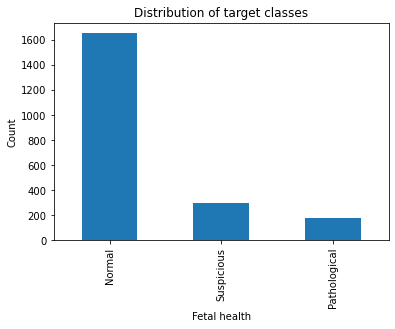

In [14]:
ctg_targets.value_counts().plot(kind='bar')

plt.title("Distribution of target classes")
plt.xlabel("Fetal health")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Normal", "Suspicious", "Pathological"])
plt.show()

Last thing to do before moving on to choosing and training algorithms will be to split the data into training and testing sets. The default options of the `train_test_split` method will be used to split the data - 25% of it will be left for testing and 75% used for training. Since the target classes are not equally distributed, as can be seen above, stratification based on the target variable will be used when splitting the data.

In [15]:
ctg_attributes_train, ctg_attributes_test, ctg_targets_train, ctg_targets_test = train_test_split(
    ctg_attributes_scaled, ctg_targets, stratify=ctg_targets)

The sizes of the new sets are as follows:

In [16]:
print(f"Attributes training set size: {ctg_attributes_train.shape[0]} (with {ctg_attributes_train.shape[1]} attributes)")
print(f"Targets training set size: {ctg_targets_train.shape[0]}")

Attributes training set size: 1594 (with 21 attributes)
Targets training set size: 1594


In [17]:
print(f"Attributes testing set size: {ctg_attributes_test.shape[0]} (with {ctg_attributes_test.shape[1]} attributes)")
print(f"Targets testing set size: {ctg_targets_test.shape[0]}")

Attributes testing set size: 532 (with 21 attributes)
Targets testing set size: 532


### Training models

#### Logistic Regression

As the task at hand represents a classification problem, the first algorithm to be trained on the data will be a logistic regression. Let's start with a "plain" model and see a classification report on the scoring metrics. 

In [18]:
plain_logistic_regression = LogisticRegression().fit(ctg_attributes_train, ctg_targets_train)

In [19]:
print(classification_report(ctg_targets_train, plain_logistic_regression.predict(ctg_attributes_train)))

              precision    recall  f1-score   support

           1       0.92      0.97      0.95      1241
           2       0.71      0.59      0.64       221
           3       0.85      0.70      0.77       132

    accuracy                           0.89      1594
   macro avg       0.83      0.75      0.78      1594
weighted avg       0.89      0.89      0.89      1594



The scoring of the model looks very good for the first class and not so bad for the other two. It can also be seen that accuracy and F1-score are comparable. Nevertheless since we are dealing with imbalanced data with a multiclass target variable, F1-score with weighted average will be used as a scoring metric.

So in order to find the best scoring model, first the best combination of hyperparameters must be found. This can be done using a grid search cross validation. The hyperparameters and the ranges from which they will be optimized are the following:

* `C`: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000
* `max_iter`: 100, 500, 1000, 10000
* `fit_intercept`: True, False

In [20]:
params_lgr = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "max_iter": [100, 500, 1000, 10000],
    "fit_intercept": [True, False],
}

grid_search_lgr = GridSearchCV(estimator=LogisticRegression(), param_grid=params_lgr, scoring="f1_weighted")

In [21]:
grid_search_lgr.fit(ctg_attributes_train, ctg_targets_train)

C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000, 10000]},
             scoring='f1_weighted')

In [22]:
logistic_regression = grid_search_lgr.best_estimator_
logistic_regression_train_score = grid_search_lgr.best_score_

In [23]:
print(f"The best estimator is {logistic_regression} with a score of {logistic_regression_train_score}")

The best estimator is LogisticRegression(C=100) with a score of 0.8897259971573341


This looks like a good score and it seems the number of maximum iterations is not important in this case so it can be removed from the grid search parameters, but for now I will leave it as it is.

Now let's move on to some trees and forests and see how those algorithms will perform.

#### Decision Tree

We have already decided on the scoring metric and what we have to do now is again fine-tune the important hyperparameters of the model. This will be done again using grid search cross validation. The hyperparamteres to be optimized here are the following:

* `max_depth`: 1, 3, 5, 7, 9, 11, 13, 15
* `min_samples_leaf`: 2, 5, 10, 12

In [24]:
params_dt = {
    "max_depth": [1, 3, 5, 7, 9, 11, 13, 15],
    "min_samples_leaf": [2, 5, 10, 12],
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_dt, scoring="f1_weighted")

In [25]:
grid_search_dt.fit(ctg_attributes_train, ctg_targets_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [2, 5, 10, 12]},
             scoring='f1_weighted')

In [26]:
decision_tree = grid_search_dt.best_estimator_
decision_tree_train_score = grid_search_dt.best_score_
print(f"The best estimator is {decision_tree} with a score of {decision_tree_train_score}")

The best estimator is DecisionTreeClassifier(max_depth=9, min_samples_leaf=2) with a score of 0.924544447057165


It looks like the decision tree classifier is performing better than the logistic regression. Let's see how a random forest will do with the training data.

#### Random Forest

Same as before we will first optimize the hyperparameters of the model to choose the best estimator. The hyperparameters and their ranges here are:

* `n_estimators`: 100, 200, 300, 400, 500
* `max_depth`: 10, 20, 50, 100, 200

In [27]:
params_rf = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [10, 20, 50, 100, 200],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, scoring="f1_weighted")

In [28]:
grid_search_rf.fit(ctg_attributes_train, ctg_targets_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 100, 200],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1_weighted')

In [29]:
random_forest = grid_search_rf.best_estimator_
random_forest_train_score = grid_search_rf.best_score_
print(f"The best estimator is {random_forest} with a score of {random_forest_train_score}")

The best estimator is RandomForestClassifier(max_depth=50, n_estimators=400) with a score of 0.9398809762481243


So far the decision tree seems to have the best score among the trained algorithms. Before comparing the performance of all the models on the testing data, let's add two more using support vector machines.

#### Linear Support Vector Classifier

We will perform the already known steps with the following hyperparameter:

* `C`: 0.01, 0.1, 1, 10, 100

In [30]:
params_ln_svc = {
    "C": [0.01, 0.1, 1, 10, 100],
}

grid_search_ln_svc = GridSearchCV(estimator=LinearSVC(), param_grid=params_ln_svc, scoring="f1_weighted")

In [31]:
grid_search_ln_svc.fit(ctg_attributes_train, ctg_targets_train)

C:\Users\Toni\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Toni\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='f1_weighted')

In [32]:
linear_svc = grid_search_ln_svc.best_estimator_
linear_svc_train_score = grid_search_ln_svc.best_score_
print(f"The best estimator is {linear_svc} with a score of {linear_svc_train_score}")

The best estimator is LinearSVC(C=10) with a score of 0.8889771279276207


#### Gaussian Support Vector Classifier

One last time we will run a grid search cross validation to find the best scoring gaussian support vector classifier. To do so, the following hyperparameteres will be tuned:

* `C`: 0.1, 1, 10, 20, 100, 200, 500
* `gamma`: 0.01, 0.05, 0.1, 0.5, 0.7

In [33]:
params_g_svc = {
    "C": [0.1, 1, 10, 20, 100, 200, 500],
    "gamma": [0.01, 0.05, 0.1, 0.5, 0.7]
}

grid_search_g_svc = GridSearchCV(estimator=SVC(), param_grid=params_g_svc, scoring="f1_weighted")

In [34]:
grid_search_g_svc.fit(ctg_attributes_train, ctg_targets_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 100, 200, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 0.7]},
             scoring='f1_weighted')

In [35]:
gaussian_svc = grid_search_g_svc.best_estimator_
gaussian_svc_train_score = grid_search_g_svc.best_score_
print(f"The best estimator is {gaussian_svc} with a score of {gaussian_svc_train_score}")

The best estimator is SVC(C=100, gamma=0.5) with a score of 0.9234446938858808


### Choosing the best scoring model

After training the models on the training set of the data and choosing the best estimator from each type, now it's time to compare their performances and choose the best from the best.

In order to do that, each model will be tested with the testing data and scored using the F1-score with weighted average.

To make things a bit easier and cleaner, let's create a function that returns the F1-score value.

In [36]:
def get_f1_score(model, test_attributes, y_true):
    y_predicted = model.predict(test_attributes)
    return f1_score(y_true, y_predicted, average="weighted")

In [37]:
logistic_regression_test_score = get_f1_score(logistic_regression, ctg_attributes_test, ctg_targets_test)

decision_tree_test_score = get_f1_score(decision_tree, ctg_attributes_test, ctg_targets_test)
random_forest_test_score = get_f1_score(random_forest, ctg_attributes_test, ctg_targets_test)

linear_svc_test_score = get_f1_score(linear_svc, ctg_attributes_test, ctg_targets_test)
gaussian_svc_test_score = get_f1_score(gaussian_svc, ctg_attributes_test, ctg_targets_test)

In [38]:
print("Testing scores:")
print(f"Logistic Regression: {logistic_regression_test_score}")
print(f"Decision Tree CLassifier: {decision_tree_test_score}")
print(f"Random Forest Classifier: {random_forest_test_score}")
print(f"Linear Support Vector Classifier: {linear_svc_test_score}")
print(f"Gaussian Support Vector Classifier: {gaussian_svc_test_score}")

Testing scores:
Logistic Regression: 0.9093061543719438
Decision Tree CLassifier: 0.9175916642341325
Random Forest Classifier: 0.9348694793201515
Linear Support Vector Classifier: 0.9007844712048831
Gaussian Support Vector Classifier: 0.925835182027478


The best performing model with the current data is the random forest classifier with approximately 0.94 testing score.

### Conclusion

A couple of classification algorithms were tested for the prediction of fetal health from available data of CTG features. All of them performed rather high, but the best one of those algorithms proved to be the random forest classifier which can identify with 94% certainty the correct fetal condition, as classified by professionals in the field.

What this analysis shows us is that the data obtained from the SisPorto program in combination with one of the trained algorithms, preferably the random forest classifier, can be useful when classifing fetal health condition in regards to the basic CTG features that are measured.

### References
   1.	https://archive.ics.uci.edu/ml/datasets/cardiotocography
   2.	https://www.kaggle.com/andrewmvd/fetal-health-classification
   3.	Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (https://pubmed.ncbi.nlm.nih.gov/11132590/)
   4.	Christian M. Pettker, Katherine H. Campbell, Antepartum Fetal Assessment in Avery's Diseases of the Newborn (Tenth Edition), 2018
   5.	https://en.wikipedia.org/wiki/Cardiotocography
   6.	https://geekymedics.com/how-to-read-a-ctg/
   7.	D. Ayres-de-Campos et al. / International Journal of Gynecology and Obstetrics 131 (2015) 13–24 (https://obgyn.onlinelibrary.wiley.com/doi/epdf/10.1016/j.ijgo.2015.06.020 )
   8. Scikit-learn documentation